In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Hours and Scores.csv")

df = df.drop(df.columns[0], axis=1)

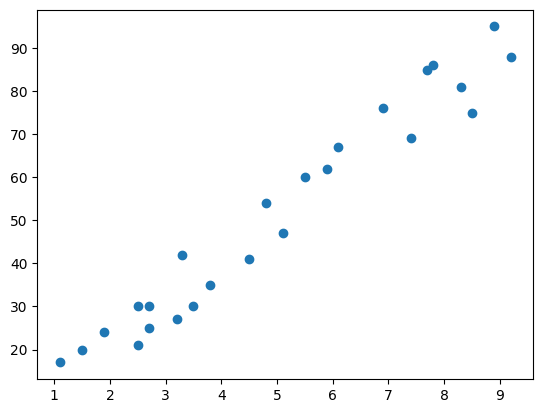

In [ ]:
plt.scatter(df.Hours, df.Scores)

Mean squared error: 29.029881694910035


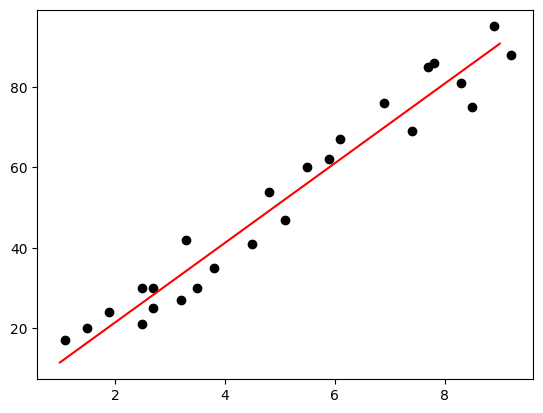

In [ ]:
# Mean squared error
def loss_function(m, b, points):
  total_error = 0
  for i in range(len(points)):
    x = points.iloc[i].Hours
    y = points.iloc[i].Scores
    total_error += (y -(m * x + b)) ** 2

  return total_error / float(len(points))


def gradient_descent(m_now, b_now, points, L):
  m_gradient = 0
  b_gradient = 0

  n = len(points)

  for i in range(n):
    x = points.iloc[i].Hours
    y = points.iloc[i].Scores

    m_gradient += -(2/n) * x * (y - (m_now * x + b_now))
    b_gradient += -(2/n) * (y - (m_now * x + b_now))

  m = m_now - m_gradient * L
  b = b_now - b_gradient * L

  return m, b

m = 0
b = 0
L = 0.001
epochs = 100

for i in range(epochs):

  m, b = gradient_descent(m, b, df, L)

"""def predict(m, b, df_test):
  for in range(len(df_test)):
    x = df_test.iloc[i].Hours
    print(x * m + b)"""

# predict(m, b, df_test)

print(f"Mean squared error: {loss_function(m, b, df)}")


plt.scatter(df.Hours, df.Scores, color="black")
plt.plot(list(range(1, 10)), [m * x + b for x in range(1, 10)], color="red")
plt.show()


